# Data Cleaning
resource: https://www.kaggle.com/learn/data-cleaning 

In [1]:
import numpy as np
import pandas as pd

### Part 1
## Handling Missing Values
Drop missing values, or fill them in with an automated workflow.

In [2]:
data_df = pd.read_csv('Data/car-sales-extended-missing-data.csv')

In [4]:
data_df.shape

(1000, 5)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [16]:
missing_count = data_df.isnull().sum()

In [17]:
missing_count

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [21]:
total_cells = np.product(data_df.shape)

In [22]:
missing_val = data_df.isnull().sum().sum()

In [25]:
percentage = (missing_val/total_cells) * 100
percentage

4.9799999999999995

In [28]:
new_df = data_df.loc[:10,:'Doors']

In [34]:
new_df

Make Colour  Odometer (KM)  Doors
0    Honda  White        35431.0    4.0
1      BMW   Blue       192714.0    5.0
2    Honda  White        84714.0    4.0
3   Toyota  White       154365.0    4.0
4   Nissan   Blue       181577.0    3.0
5    Honda    Red        42652.0    4.0
6   Toyota   Blue       163453.0    4.0
7    Honda  White            NaN    4.0
8      NaN  White       130538.0    4.0
9    Honda   Blue        51029.0    4.0
10  Nissan  White       167421.0    4.0

In [38]:
new_df.fillna(method='ffill',axis=0)

Make Colour  Odometer (KM)  Doors
0    Honda  White        35431.0    4.0
1      BMW   Blue       192714.0    5.0
2    Honda  White        84714.0    4.0
3   Toyota  White       154365.0    4.0
4   Nissan   Blue       181577.0    3.0
5    Honda    Red        42652.0    4.0
6   Toyota   Blue       163453.0    4.0
7    Honda  White       163453.0    4.0
8    Honda  White       130538.0    4.0
9    Honda   Blue        51029.0    4.0
10  Nissan  White       167421.0    4.0

### Part 2
## Scaling and Normalization
Transform numeric variables to have helpful properties.

### Scipy
FUNDAMENTAL ALGORITHMS :
SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.
BROADLY APPLICABLE :
The algorithms and data structures provided by SciPy are broadly applicable across domains.
FOUNDATIONAL :
Extends NumPy providing additional tools for array computing and provides specialized data structures, such as sparse matrices and k-dimensional trees.
PERFORMANT :
SciPy wraps highly-optimized implementations written in low-level languages like Fortran, C, and C++. Enjoy the flexibility of Python with the speed of compiled code.

In [43]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(80)

In [41]:
original_data = np.random.exponential(size = 1000)

In [45]:
scaled_data = minmax_scaling(original_data , columns=[0])

Scaling 

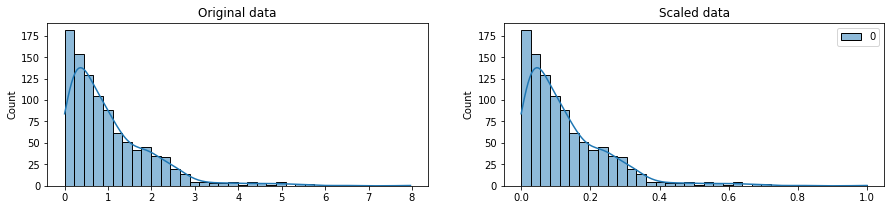

In [71]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data,ax=ax[0],kde=True,legend=True)
ax[0].set_title('Original data')

sns.histplot(scaled_data,ax=ax[1],kde=True,legend=True)
ax[1].set_title('Scaled data')
plt.show()



Transformation

In [56]:
transformed_data = stats.boxcox(original_data)

In [65]:
transformed_data[0][:50]

array([ 0.40096452,  0.8246919 , -0.0856056 , -1.29655   ,  0.60106516,
       -1.75931549,  0.24281194,  0.21686761, -1.05329484, -0.55703839,
        1.86797005,  0.71139696, -1.45270913,  0.82183215,  0.99315353,
        0.48019837,  1.13707183,  0.66854657, -0.73254456, -0.44798458,
       -0.18597129, -1.7180123 , -0.26813451, -1.82993703, -1.22299126,
        0.32797224,  2.03192272,  0.02538347,  0.20148775, -1.40111949,
        1.11572089, -1.3943253 , -0.2152625 , -0.52872972,  0.688928  ,
        0.22106749, -0.15250513,  1.43988479, -0.85065063,  0.74444043,
       -1.49203272, -0.18171424,  0.77770215, -0.19701133, -0.75691032,
        0.88630495,  0.73419927, -0.77654914,  0.70935303, -0.57107124])

In [69]:
original_data[:50]

array([1.46328324, 2.10532975, 0.91703293, 0.20261437, 1.74533017,
       0.09181419, 1.26512872, 1.23460049, 0.28948199, 0.54676244,
       4.53609887, 1.91679403, 0.15801299, 2.10041096, 2.41021353,
       1.57064225, 2.69517342, 1.84880693, 0.44203576, 0.62031507,
       0.82628969, 0.09925737, 0.7570309 , 0.08004255, 0.2265285 ,
       1.36921352, 5.05019842, 1.02561944, 1.2167591 , 0.17185959,
       2.65142206, 0.17374689, 0.8010906 , 0.56520785, 1.88092107,
       1.23950555, 0.85578286, 3.37402459, 0.38035352, 1.97045323,
       0.14801928, 0.82999955, 2.02556546, 0.81672509, 0.4287532 ,
       2.21335917, 1.95370697, 0.41826132, 1.91351032, 0.53778358])

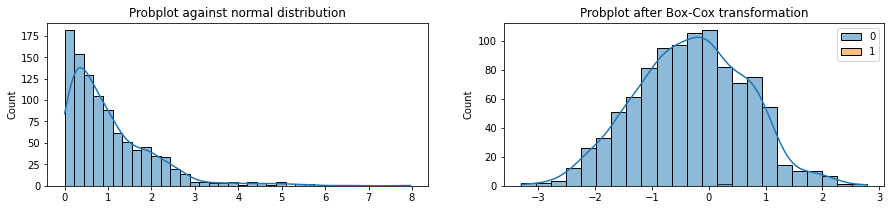

In [73]:
fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data,ax=ax[0],kde=True,legend=True)
ax[0].set_title('Probplot against normal distribution')

sns.histplot(transformed_data,ax=ax[1],kde=True,legend=True)
ax[1].set_title('Probplot after Box-Cox transformation')
plt.show()

Text(0.5, 1.0, 'Probplot against normal distribution')

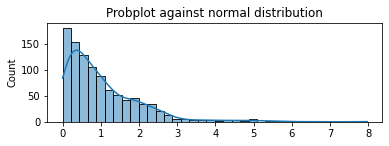

In [76]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
sns.histplot(original_data,ax=ax1,kde=True,legend=True)
ax1.set_title('Probplot against normal distribution')

### Part 3
## Parsing Dates
Help Python recognize dates as composed of day, month, and year.

In [77]:
import datetime as dt

In [88]:
catalog_df = pd.read_csv('~/Documents/Internship/Github/internship-ds/prerequisites-courses/data/catalog.csv')

In [91]:
catalog_df.head()['date']

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

In [95]:
catalog_df['date']= pd.to_datetime(catalog_df['date'],format="%m/%d/%y")

#### What if I run into an error with multiple date formats? 
> While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you can have pandas try to infer what the right date format should be. You can do that like so:

#### + catalog_df['date'] = pd.to_datetime(catalog_df['date'], infer_datetime_format=True)

#### Why don't you always use infer_datetime_format = True? 
> There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [98]:
catalog_df['date'][:5]

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [103]:
month_data = catalog_df['date'].dt.month

<AxesSubplot:xlabel='date', ylabel='Count'>

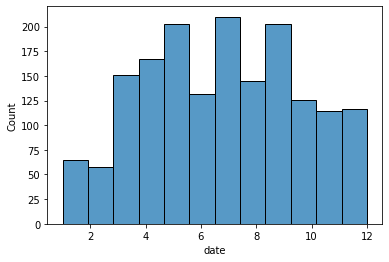

In [104]:
sns.histplot(month_data,kde=False,bins=12)

### Part 4
## Character Encodings
Avoid UnicoodeDecodeErrors when loading CSV files.

In [106]:
import chardet

### Part 3